In [17]:
import pandas as pd
import numpy as np

In [18]:
train = pd.read_csv('adult.data',header = None)

In [19]:
test = pd.read_csv('adult.test', skiprows = 1, header = None)

In [124]:
col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'wage_class'] 
 
train.columns = col_labels 
 
test.columns = col_labels

In [125]:
df = pd.concat([train,test])

In [126]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education_num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      48842 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital_gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hours_per_week  48842 non-null  int64 
 13  native_country  48842 non-null  object
 14  wage_class      48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


In [128]:
for col in df.columns:
    print(col,df[col].unique(), end="\n\n")

age [39 50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87 89]

workclass [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']

fnlwgt [ 77516  83311 215646 ... 173449  89686 350977]

education [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

education_num [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8]

marital_status [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

occupation [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' 

### The columns workclass, occupation, native_country have " ?" values which are missing values

In [129]:
# making " ?" into NaN values

df.workclass = df.workclass.replace(" ?",np.nan)
df.occupation = df.occupation.replace(" ?",np.nan)
df.native_country = df.native_country.replace(" ?",np.nan)

In [130]:
df.info() # check now

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48842 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       46043 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education_num   48842 non-null  int64 
 5   marital_status  48842 non-null  object
 6   occupation      46033 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital_gain    48842 non-null  int64 
 11  capital_loss    48842 non-null  int64 
 12  hours_per_week  48842 non-null  int64 
 13  native_country  47985 non-null  object
 14  wage_class      48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 6.0+ MB


### We dont have a way to predict these values so we will have to drop them...

In [131]:
df.dropna(inplace=True) 
# drop those rows as it is not possible to predict them

### 'capital loss' and 'capital gain' columns are preaty much empty of values... so drop them

In [132]:
print(df['capital_loss'].value_counts())
print(df['capital_gain'].value_counts())

0       43082
1902      294
1977      246
1887      228
2415       68
        ...  
2201        1
1421        1
4356        1
2163        1
1870        1
Name: capital_loss, Length: 97, dtype: int64
0        41432
15024      498
7688       391
7298       351
99999      229
         ...  
1731         1
22040        1
7262         1
1639         1
2387         1
Name: capital_gain, Length: 121, dtype: int64


In [133]:
df.drop(columns=['capital_loss','capital_gain'],inplace=True) 
# these columns have too many missing values so drop them

### Comparing education_num and education columns

In [134]:
for i in df['education_num'].unique():
    print(i,df[df["education_num"]==i]['education'].unique())

13 [' Bachelors']
9 [' HS-grad']
7 [' 11th']
14 [' Masters']
5 [' 9th']
10 [' Some-college']
12 [' Assoc-acdm']
4 [' 7th-8th']
16 [' Doctorate']
11 [' Assoc-voc']
15 [' Prof-school']
3 [' 5th-6th']
6 [' 10th']
1 [' Preschool']
8 [' 12th']
2 [' 1st-4th']


### looks like the education_num column is properly numbered to education column... lets drop the education column which has type object, education_num column should suffice

In [135]:
# we can drop education column...
df.drop(columns=['education'],inplace=True)

### make our target feature into numeric type...

In [136]:
# make wage_class into numeric
# the test part had <=50K. and >50K.
# the train part had <=50K and >50K

df.wage_class = df.wage_class.replace({' <=50K.': 0,' >50K.':1,' <=50K': 0,' >50K':1})

In [137]:
df.wage_class

0        0
1        0
2        0
3        0
4        0
        ..
16275    0
16276    0
16278    0
16279    0
16280    1
Name: wage_class, Length: 45222, dtype: int64

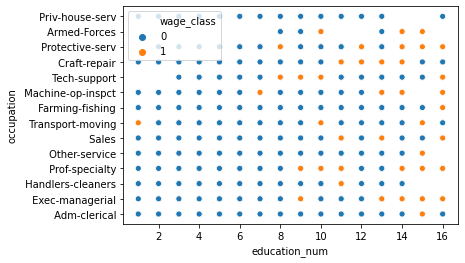

In [138]:
# df.head()
sns.scatterplot(hue=df['wage_class'],y=df['occupation'],x=df['education_num']);

In [139]:
l=[]
for i in df.occupation.unique():
    print(i)
    print(df[df['occupation']==i].wage_class.value_counts()[1])
    l.append((df[df['occupation']==i].wage_class.value_counts()[1],i))

 Adm-clerical
756
 Exec-managerial
2867
 Handlers-cleaners
135
 Prof-specialty
2704
 Other-service
196
 Sales
1455
 Transport-moving
478
 Farming-fishing
172
 Machine-op-inspct
365
 Tech-support
411
 Craft-repair
1355
 Protective-serv
307
 Armed-Forces
4
 Priv-house-serv
3


In [140]:
l

[(756, ' Adm-clerical'),
 (2867, ' Exec-managerial'),
 (135, ' Handlers-cleaners'),
 (2704, ' Prof-specialty'),
 (196, ' Other-service'),
 (1455, ' Sales'),
 (478, ' Transport-moving'),
 (172, ' Farming-fishing'),
 (365, ' Machine-op-inspct'),
 (411, ' Tech-support'),
 (1355, ' Craft-repair'),
 (307, ' Protective-serv'),
 (4, ' Armed-Forces'),
 (3, ' Priv-house-serv')]

In [141]:
occ = {' Adm-clerical':9, ' Exec-managerial':13, ' Handlers-cleaners':2,
       ' Prof-specialty':12, ' Other-service':4, ' Sales':11, ' Transport-moving':8,
       ' Farming-fishing':3, ' Machine-op-inspct':6, ' Tech-support':7,
       ' Craft-repair':10, ' Protective-serv':5, ' Armed-Forces':1,
       ' Priv-house-serv':0}

In [142]:
df.occupation = df.occupation.replace(occ)

In [143]:
df.head()

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,wage_class
0,39,State-gov,77516,13,Never-married,9,Not-in-family,White,Male,40,United-States,0
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,13,Husband,White,Male,13,United-States,0
2,38,Private,215646,9,Divorced,2,Not-in-family,White,Male,40,United-States,0
3,53,Private,234721,7,Married-civ-spouse,2,Husband,Black,Male,40,United-States,0
4,28,Private,338409,13,Married-civ-spouse,12,Wife,Black,Female,40,Cuba,0


In [144]:
df.marital_status.unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [187]:
l=[]
for i in df.marital_status.unique():
    print(i)
    print(df[df['marital_status']==i].wage_class.value_counts()[0]/df[df['marital_status']==i].wage_class.value_counts()[1])
#     l.append((df[df['marital_status']==i].wage_class.value_counts(),i))
#     print(df[df['marital_status']==i].wage_class.value_counts())
    l.append(df[df['marital_status']==i].wage_class.value_counts()[0]/df[df['marital_status']==i].wage_class.value_counts()[1])
np.sort(l)

 Never-married
19.82453637660485
 Married-civ-spouse
1.2014847344207444
 Divorced
8.613740458015267
 Married-spouse-absent
9.222222222222221
 Separated
13.252525252525253
 Married-AF-spouse
1.2857142857142858
 Widowed
9.553719008264462


array([ 1.20148473,  1.28571429,  8.61374046,  9.22222222,  9.55371901,
       13.25252525, 19.82453638])

In [193]:
m_status = {' Never-married':6, ' Married-civ-spouse':0, ' Divorced':2,
       ' Married-spouse-absent':3, ' Separated':5, ' Married-AF-spouse':1,
       ' Widowed':4}

df.marital_status = df.marital_status.replace(m_status)

In [194]:
df.head()

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,wage_class
0,39,State-gov,77516,13,6,9,Not-in-family,White,Male,40,United-States,0
1,50,Self-emp-not-inc,83311,13,0,13,Husband,White,Male,13,United-States,0
2,38,Private,215646,9,2,2,Not-in-family,White,Male,40,United-States,0
3,53,Private,234721,7,0,2,Husband,Black,Male,40,United-States,0
4,28,Private,338409,13,0,12,Wife,Black,Female,40,Cuba,0


### Convert rest of the columns to numeric

In [195]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col]= df[col].astype('category')
        df[col] = df[col].cat.codes

In [196]:
df.head()

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,hours_per_week,native_country,wage_class
0,39,5,77516,13,6,9,1,4,1,40,38,0
1,50,4,83311,13,0,13,0,4,1,13,38,0
2,38,2,215646,9,2,2,1,4,1,40,38,0
3,53,2,234721,7,0,2,0,2,1,40,38,0
4,28,2,338409,13,0,12,5,2,0,40,4,0


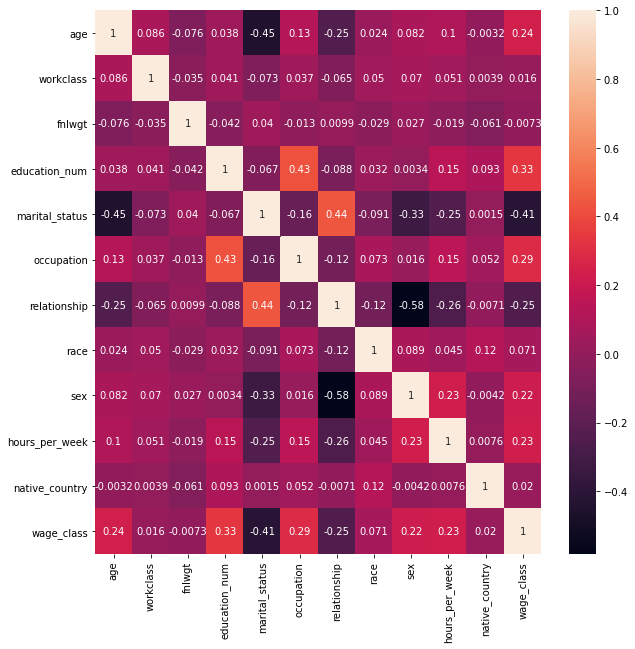

In [197]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data=df.corr(), annot=True, ax=ax);

### Age, education, marital_status, relationship, sex, hours_per_week, occuption have some correlation with the output feature wage_class

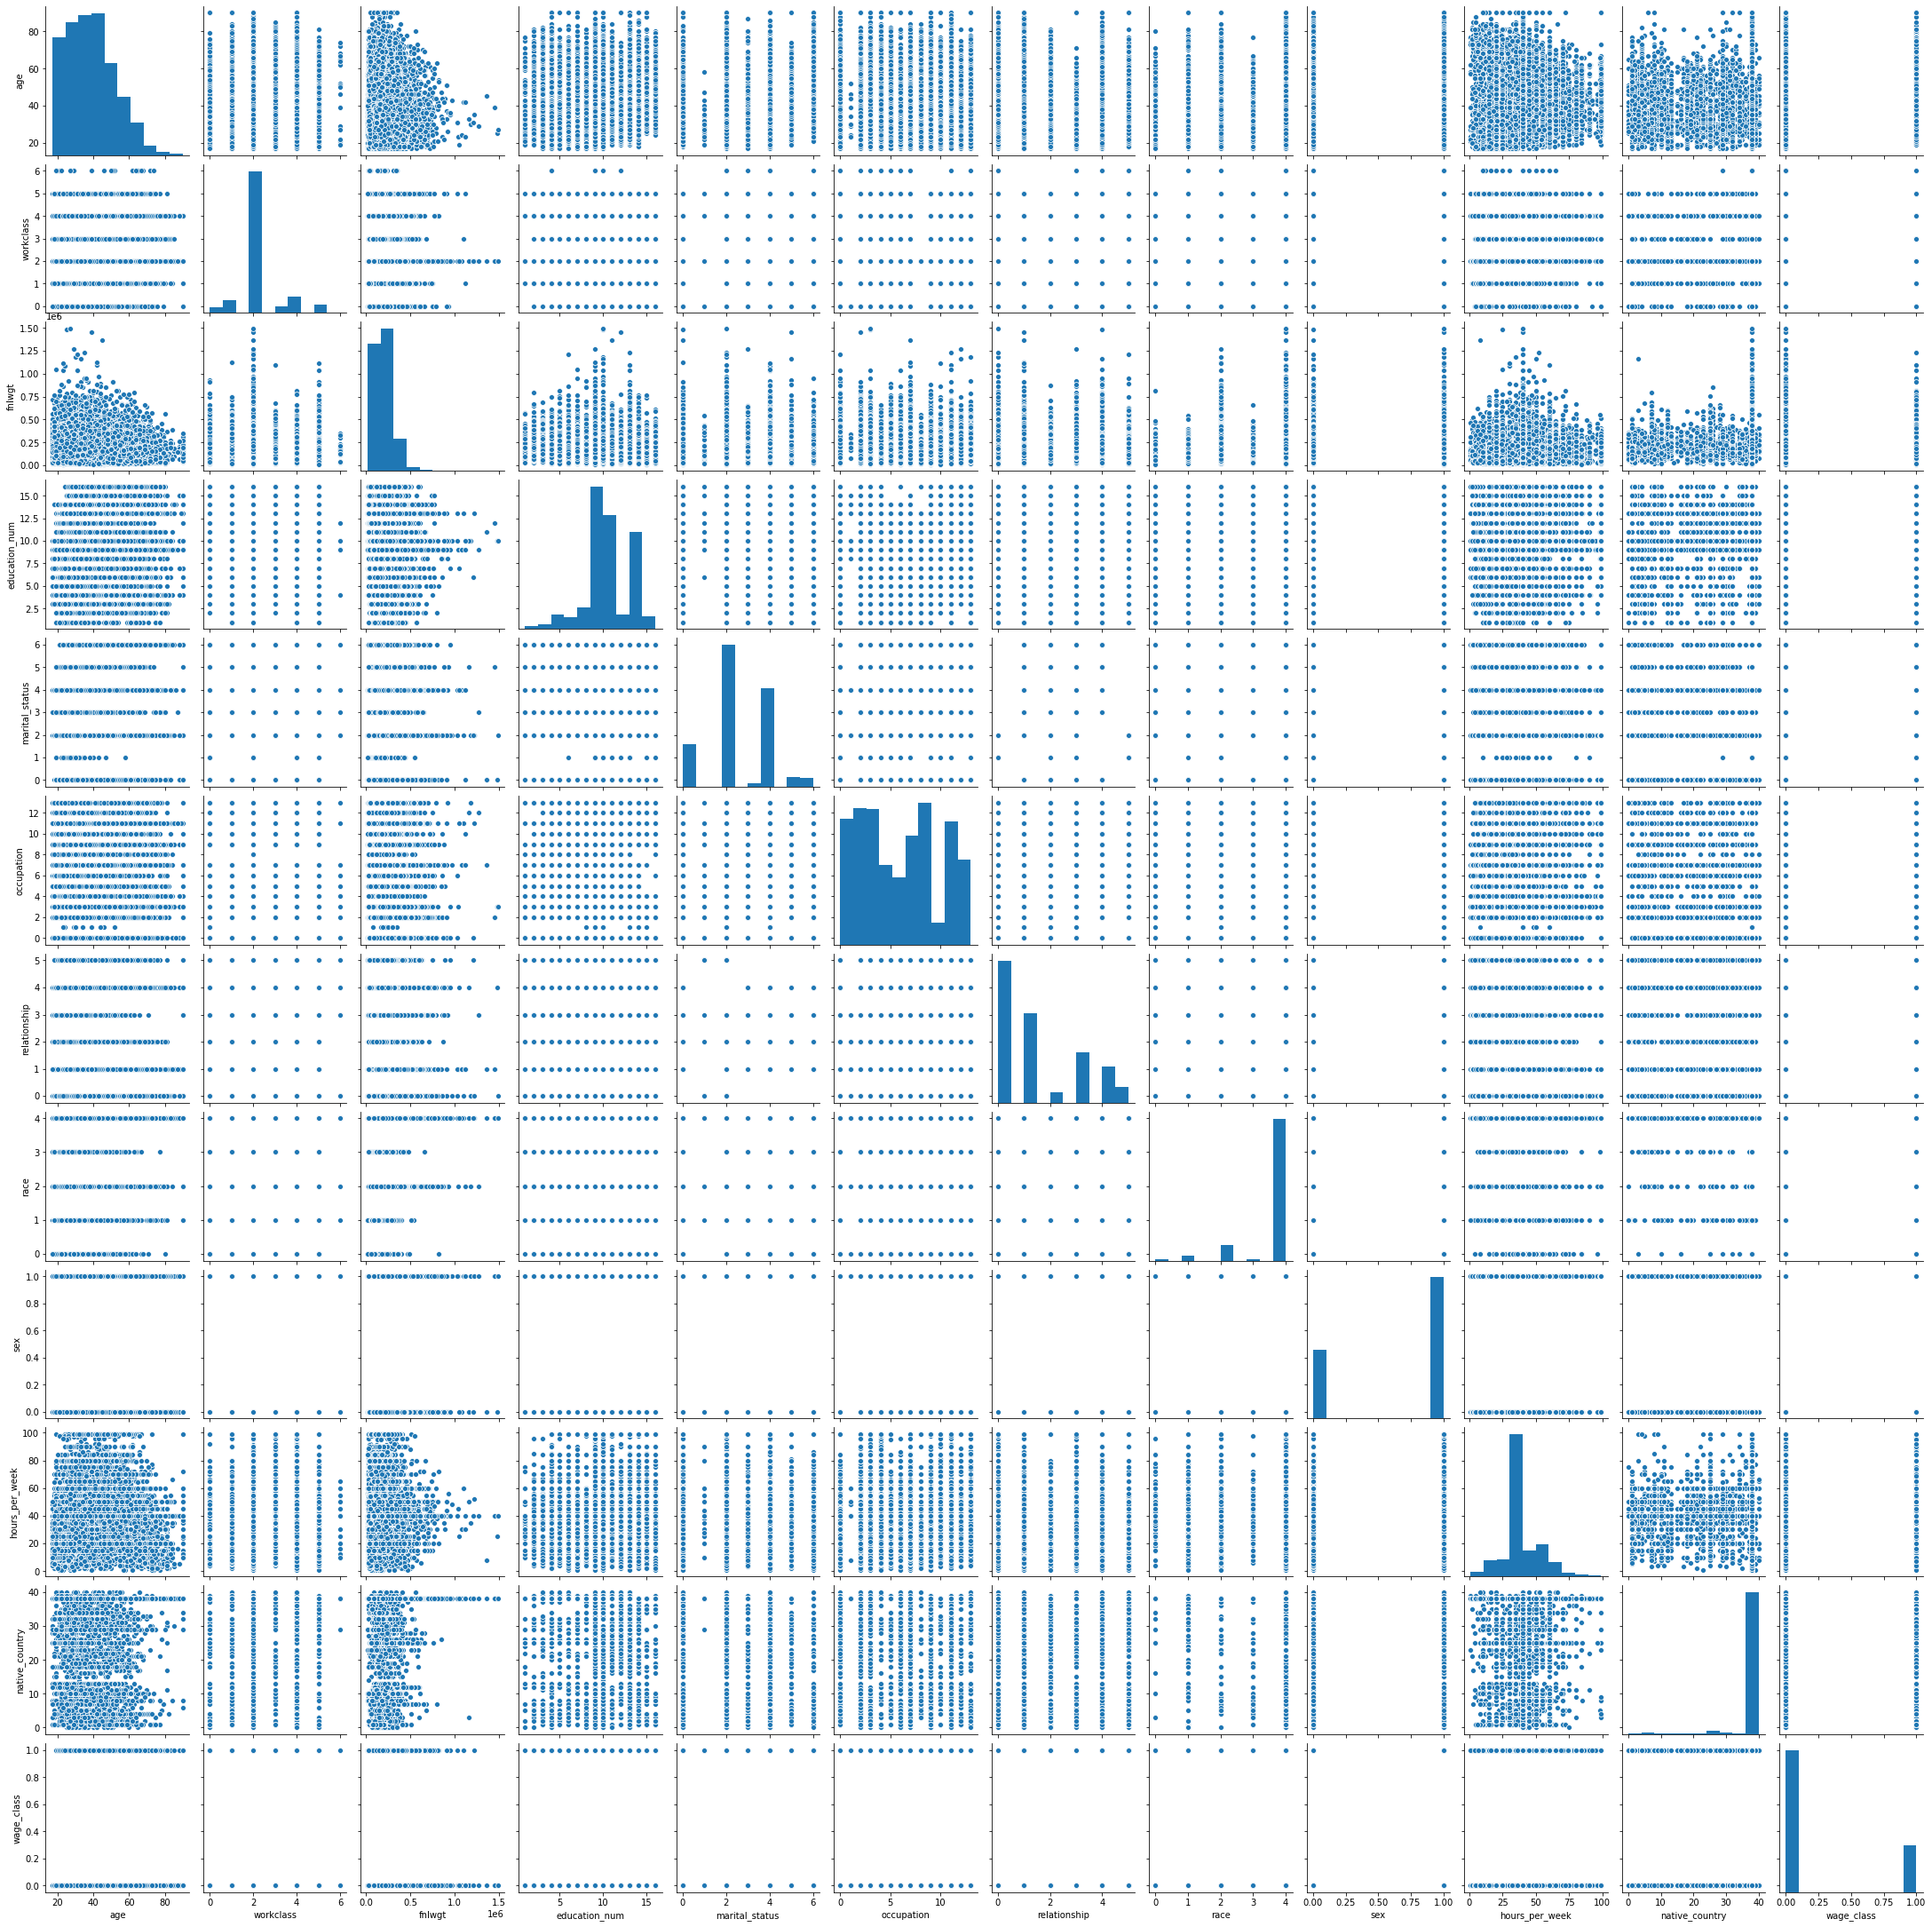

In [48]:
sns.pairplot(df)
plt.show();

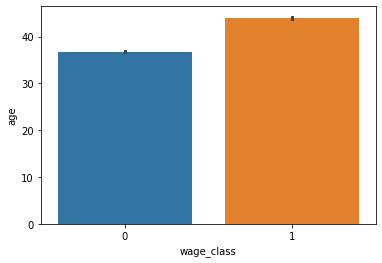

In [51]:
sns.barplot(x=df.iloc[:,-1],y=df.iloc[:,0]);
sns.barplot(x=df.iloc[:,-1],y=df.iloc[:,0]);

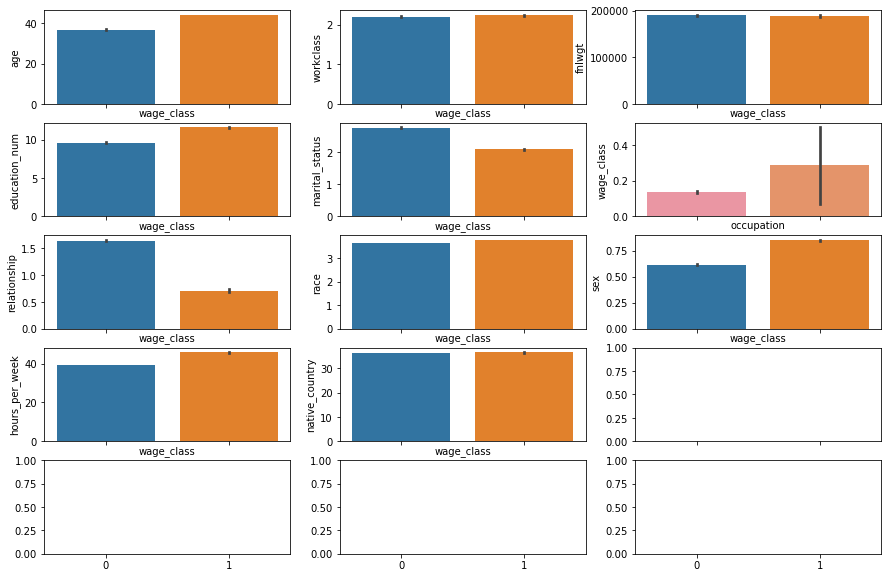

In [66]:
figure, axes = plt.subplots(4,3,figsize=(15,10), sharex=True)
sns.barplot(x=df.iloc[:,-1],y=df.iloc[:,0],ax=axes[0,0]);
sns.barplot(x=df.iloc[:,-1],y=df.iloc[:,1],ax=axes[0,1]);
sns.barplot(x=df.iloc[:,-1],y=df.iloc[:,2],ax=axes[0,2]);
sns.barplot(x=df.iloc[:,-1],y=df.iloc[:,3],ax=axes[1,0]);
sns.barplot(x=df.iloc[:,-1],y=df.iloc[:,4],ax=axes[1,1]);
sns.barplot(y=df.iloc[:,-1],x=df.iloc[:,5],ax=axes[1,2]);
sns.barplot(x=df.iloc[:,-1],y=df.iloc[:,6],ax=axes[2,0]);
sns.barplot(x=df.iloc[:,-1],y=df.iloc[:,7],ax=axes[2,1]);
sns.barplot(x=df.iloc[:,-1],y=df.iloc[:,8],ax=axes[2,2]);
sns.barplot(x=df.iloc[:,-1],y=df.iloc[:,9],ax=axes[3,0]);
sns.barplot(x=df.iloc[:,-1],y=df.iloc[:,10],ax=axes[3,1]);


In [289]:
from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
x_transform = scalar.fit_transform(df.iloc[:,:-1])

In [291]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_transform,df.iloc[:,-1],test_size=0.3)

## Trying models...

### XGBoost 83.6%

In [286]:
from xgboost import XGBClassifier

clf = XGBClassifier(objective='binary:logistic')
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

c:\users\syed rahim saqib\python_miniconda\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:39:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.8076951426254884

### KNN classifier 82.2%

In [287]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

clf = KNeighborsClassifier(n_neighbors=10)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8045256873295497

In [288]:
param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,20,25,27,30,32,34],
               'n_neighbors' : [3,5,7,9,10,11,12,13]
              }

In [266]:
gridsearch = GridSearchCV(clf, param_grid,verbose=3)

In [242]:
gridsearch.fit(x_train,y_train)

Fitting 5 folds for each of 168 candidates, totalling 840 fits
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.679, total=   7.8s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.7s remaining:    0.0s


[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.674, total=   7.8s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   15.5s remaining:    0.0s


[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.681, total=   8.4s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.670, total=   7.9s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.674, total=  10.4s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.706, total=   8.5s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.701, total=   9.5s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.705, total=   7.8s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=5 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=5, score=0.696, total= 

KeyboardInterrupt: 

### Logistic regression 77%

In [267]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve

log_reg = LogisticRegression(max_iter=200)
log_reg.fit(x_train,y_train);
log_reg.score(x_test,y_test)

0.7503501142478072

In [268]:
auc = roc_auc_score(y_test, y_pred)
auc

0.5

In [269]:
y_pred = log_reg.predict(x_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

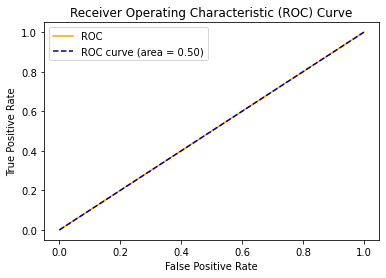

In [270]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

### Decision tree 77%

In [271]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.7538881108572271

### Bagging 82.4%

In [272]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [273]:
bag_knn = BaggingClassifier(KNeighborsClassifier(n_neighbors=5),
                            n_estimators=10, max_samples=0.5,
                            bootstrap=True, random_state=3,oob_score=True)

In [274]:
bag_knn.fit(X_train, y_train)
bag_knn.score(X_test, y_test)

c:\users\syed rahim saqib\python_miniconda\lib\site-packages\sklearn\ensemble\_bagging.py:638: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
c:\users\syed rahim saqib\python_miniconda\lib\site-packages\sklearn\ensemble\_bagging.py:642: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = (predictions /


0.8042308542787646

### Random forest 73.7%

In [275]:
from sklearn.ensemble import RandomForestClassifier

In [276]:
rand_clf = RandomForestClassifier(random_state=6)

In [277]:
rand_clf.fit(x_train,y_train)
rand_clf.score(x_test,y_test)

0.735461045183165

### LGBMClassifier 83.9%

In [278]:
from lightgbm import LGBMClassifier

In [279]:
clf = LGBMClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8128547210142257

In [251]:
from optuna.samplers import TPESampler
import optuna
from sklearn.metrics import accuracy_score

In [252]:
sampler = TPESampler(seed=0)

def create_model(trial):
    max_depth = trial.suggest_int("max_depth", 2, 30)
    n_estimators = trial.suggest_int("n_estimators", 1, 500)
    learning_rate = trial.suggest_uniform('learning_rate', 0.001, 1)
    num_leaves = trial.suggest_int("num_leaves", 2, 5000)
    min_child_samples = trial.suggest_int('min_child_samples', 3, 200)
    model = LGBMClassifier(learning_rate=learning_rate, n_estimators=n_estimators, max_depth=max_depth, num_leaves=num_leaves, min_child_samples=min_child_samples,
                           random_state=0)
    return model

def objective(trial):
    model = create_model(trial)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    return accuracy_score(y_test, preds)

def optimize():
    study = optuna.create_study(direction="maximize", sampler=sampler)
    study.optimize(objective, n_trials=50)
    return study.best_params

params = optimize()

[I 2021-04-18 23:25:12,920] A new study created in memory with name: no-name-81bc3add-cba7-455d-8351-af5bcc4c0844
[I 2021-04-18 23:25:19,182] Trial 0 finished with value: 0.8043782708041571 and parameters: {'max_depth': 17, 'n_estimators': 358, 'learning_rate': 0.6031606126955722, 'num_leaves': 2725, 'min_child_samples': 86}. Best is trial 0 with value: 0.8043782708041571.
[I 2021-04-18 23:25:24,469] Trial 1 finished with value: 0.7994398172035085 and parameters: {'max_depth': 20, 'n_estimators': 219, 'learning_rate': 0.8918812277812977, 'num_leaves': 4819, 'min_child_samples': 78}. Best is trial 0 with value: 0.8043782708041571.
[I 2021-04-18 23:25:46,410] Trial 2 finished with value: 0.8109383061841232 and parameters: {'max_depth': 24, 'n_estimators': 265, 'learning_rate': 0.5684765165328384, 'num_leaves': 4629, 'min_child_samples': 17}. Best is trial 2 with value: 0.8109383061841232.
[I 2021-04-18 23:25:46,544] Trial 3 finished with value: 0.8351146163484927 and parameters: {'max_de

[I 2021-04-18 23:27:01,340] Trial 30 finished with value: 0.8107171813960345 and parameters: {'max_depth': 29, 'n_estimators': 231, 'learning_rate': 0.2155477663922452, 'num_leaves': 2933, 'min_child_samples': 68}. Best is trial 23 with value: 0.8393896955848751.
[I 2021-04-18 23:27:01,968] Trial 31 finished with value: 0.8366624898651139 and parameters: {'max_depth': 3, 'n_estimators': 277, 'learning_rate': 0.1534364261827339, 'num_leaves': 2264, 'min_child_samples': 60}. Best is trial 23 with value: 0.8393896955848751.
[I 2021-04-18 23:27:02,329] Trial 32 finished with value: 0.830470995798629 and parameters: {'max_depth': 2, 'n_estimators': 191, 'learning_rate': 0.031459066533989666, 'num_leaves': 2090, 'min_child_samples': 34}. Best is trial 23 with value: 0.8393896955848751.
[I 2021-04-18 23:27:02,906] Trial 33 finished with value: 0.8363676568143289 and parameters: {'max_depth': 4, 'n_estimators': 249, 'learning_rate': 0.13113284880363812, 'num_leaves': 2984, 'min_child_samples':

In [253]:
params

{'max_depth': 4,
 'n_estimators': 111,
 'learning_rate': 0.16702293833587234,
 'num_leaves': 992,
 'min_child_samples': 43}

In [256]:
params['random_state'] = 666
model = LGBMClassifier(**params)
model.fit(X_train, y_train)
preds = model.predict(X_test)
print('LGBM accuracy: ', accuracy_score(y_test, preds)*100, '%')

LGBM accuracy:  83.93896955848751 %
